In [14]:
import pandas as pd
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

In [15]:
# Degree Centrality
G = pd.read_csv("connecting_routes.csv", names = ["flights", " ID", "main Airport", "main Airport ID", "Destination","Destination  ID", "0","haults","machinary"] )
G

,flights,ID,main Airport,main Airport ID,Destination,Destination ID,0,haults,machinary
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [16]:
G = G.drop(['0'], axis = 1)
G

,flights,ID,main Airport,main Airport ID,Destination,Destination ID,haults,machinary
0,2B,410,AER,2965,KZN,2990,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,CR2
3,2B,410,CEK,2968,KZN,2990,0,CR2
4,2B,410,CEK,2968,OVB,4078,0,CR2
...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,0,734
67660,ZM,19016,FRU,2912,DME,4029,0,734
67661,ZM,19016,FRU,2912,OSS,2913,0,734


In [17]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in G.columns if G[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(G[feature].isnull().mean() * 100 , 4),  ' % missing values')

machinary 0.0266  % missing values


In [18]:
# Dropping all na  values as Data set is Big

G.dropna(inplace=True)

In [19]:
G = G.iloc[:, 1:10]

In [20]:
G

,ID,main Airport,main Airport ID,Destination,Destination ID,haults,machinary
0,410,AER,2965,KZN,2990,0,CR2
1,410,ASF,2966,KZN,2990,0,CR2
2,410,ASF,2966,MRV,2962,0,CR2
3,410,CEK,2968,KZN,2990,0,CR2
4,410,CEK,2968,OVB,4078,0,CR2
...,...,...,...,...,...,...,...
67658,4178,WYA,6334,ADL,3341,0,SF3
67659,19016,DME,4029,FRU,2912,0,734
67660,19016,FRU,2912,DME,4029,0,734
67661,19016,FRU,2912,OSS,2913,0,734


In [21]:
g = nx.Graph() #Create an empty graph with no nodes and no edges.


In [22]:
G.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67645 entries, 0 to 67662
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0    ID              67645 non-null  object
 1   main Airport     67645 non-null  object
 2   main Airport ID  67645 non-null  object
 3   Destination      67645 non-null  object
 4   Destination  ID  67645 non-null  object
 5   haults           67645 non-null  int64 
 6   machinary        67645 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.1+ MB


In [23]:
g = nx.from_pandas_edgelist(G, source = 'main Airport', target = 'Destination')

In [24]:

print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 3423
Number of edges: 19255
Average degree:  11.2504


In [25]:
b = nx.degree_centrality(g)  # Degree Centrality
print(b)

### Degree centrality is the simplest centrality measure to compute. Recall that a node's degree is simply a count of how many social connections (i.e., edges) it has. The degree centrality for a node is simply its degree. A node with 10 social connections would have a degree centrality of 10. A node with 1 edge would have a degree centrality of 1.

{'AER': 0.0052600818234950315, 'KZN': 0.0061367621274108705, 'ASF': 0.0020455873758036236, 'MRV': 0.004675628287551139, 'CEK': 0.004091174751607247, 'OVB': 0.01548801870251315, 'DME': 0.05552308591466978, 'NBC': 0.0020455873758036236, 'TGK': 0.0002922267679719462, 'UUA': 0.0008766803039158386, 'EGO': 0.0026300409117475157, 'KGD': 0.0029222676797194622, 'GYD': 0.011396843950905903, 'LED': 0.03302162478082992, 'SVX': 0.019579193454120396, 'NJC': 0.0026300409117475157, 'NUX': 0.0029222676797194622, 'BTK': 0.0011689070718877848, 'IKT': 0.008182349503214495, 'HTA': 0.0026300409117475157, 'KCK': 0.0002922267679719462, 'ODO': 0.0002922267679719462, 'UKX': 0.0002922267679719462, 'ULK': 0.0005844535359438924, 'YKS': 0.006721215663354763, 'MJZ': 0.0017533606078316772, 'AYP': 0.0002922267679719462, 'LIM': 0.016656925774400935, 'CUZ': 0.0014611338398597311, 'PEM': 0.0005844535359438924, 'HUU': 0.0002922267679719462, 'IQT': 0.0011689070718877848, 'PCL': 0.0008766803039158386, 'TPP': 0.0008766803039

In [29]:

# pos = nx.spring_layout(g, k = 0.15)
# nx.draw_networkx(g, pos, node_size = 10, node_color = 'blue')

In [30]:
# ## Betweeness Centrality 
# b = nx.betweenness_centrality(g) # Betweeness_Centrality
# print(b)

In [31]:
nx.pagerank(g, max_iter=600) 

{'AER': 0.0003343064683230163,
 'KZN': 0.0003955819912233389,
 'ASF': 0.00015757429276526852,
 'MRV': 0.0003047992673935136,
 'CEK': 0.00026754323422270923,
 'OVB': 0.0010061953087944751,
 'DME': 0.004026558905445495,
 'NBC': 0.00015544528529960408,
 'TGK': 6.181897604603297e-05,
 'UUA': 9.751642044926334e-05,
 'EGO': 0.0001887999254624028,
 'KGD': 0.00020235480828030574,
 'GYD': 0.0006624697599861746,
 'LED': 0.0021141964555380236,
 'SVX': 0.0013396692638051708,
 'NJC': 0.00020990239587358788,
 'NUX': 0.00021805576897910436,
 'BTK': 0.00011833784393693641,
 'IKT': 0.0007797865509968501,
 'HTA': 0.00022844623539324227,
 'KCK': 6.750582583390195e-05,
 'ODO': 6.750582583390195e-05,
 'UKX': 6.750582583390195e-05,
 'ULK': 9.495221283265347e-05,
 'YKS': 0.0007418981807056173,
 'MJZ': 0.0001764613549156914,
 'AYP': 7.298742101849971e-05,
 'LIM': 0.0019526086542466605,
 'CUZ': 0.00025098291031347913,
 'PEM': 0.00011578005248003779,
 'HUU': 7.298742101849971e-05,
 'IQT': 0.00018143655816504678

In [32]:

## Eigen-Vector Centrality
evg = nx.eigenvector_centrality(g, max_iter=600) # Eigen vector centrality
print(evg)

{'AER': 0.009032526632556558, 'KZN': 0.008848836471701156, 'ASF': 0.004687780726147909, 'MRV': 0.00982060609113305, 'CEK': 0.006710791701775267, 'OVB': 0.022818720174473152, 'DME': 0.07601137717244644, 'NBC': 0.006293487726165073, 'TGK': 0.0010881262220646443, 'UUA': 0.00207752992396142, 'EGO': 0.0032727716540255796, 'KGD': 0.007799913459209684, 'GYD': 0.03206600335608797, 'LED': 0.0656321456220549, 'SVX': 0.027928634764883192, 'NJC': 0.003483275193122238, 'NUX': 0.004410773265251256, 'BTK': 0.0021005095107021676, 'IKT': 0.007279070735122154, 'HTA': 0.0031370604147053283, 'KCK': 0.00010420860497182462, 'ODO': 0.00010420860497182462, 'UKX': 0.00010420860497182462, 'ULK': 0.0001946613662547246, 'YKS': 0.006318295926431097, 'MJZ': 0.0017901870651698122, 'AYP': 0.0003296708506081882, 'LIM': 0.023023556940938363, 'CUZ': 0.0003695900687688002, 'PEM': 0.00033496340197901645, 'HUU': 0.0003296708506081882, 'IQT': 0.0007907701185524654, 'PCL': 0.00034594900988505834, 'TPP': 0.0003459490098850583

In [41]:
# Eigen_df = pd.DataFrame.from_dict(evg, orient='index').T
Eigen_df  = pd.DataFrame(evg, index=[1]) 
Eigen_df

,AER,KZN,ASF,MRV,CEK,OVB,DME,NBC,TGK,UUA,...,NRA,GFN,TRO,JCK,RCM,WIN,LSY,MIM,MYA,OAG
1,0.009033,0.008849,0.004688,0.009821,0.006711,0.022819,0.076011,0.006293,0.001088,0.002078,...,0.000271,0.000004,0.000267,0.000004,6.099701e-08,0.000013,0.000267,0.000472,0.000274,0.000267


In [42]:
Eigen_df_transpose = Eigen_df.transpose()
Eigen_df_transpose

,1
AER,0.009033
KZN,0.008849
ASF,0.004688
MRV,0.009821
CEK,0.006711
...,...
WIN,0.000013
LSY,0.000267
MIM,0.000472
MYA,0.000274


In [43]:
# cluster coefficient
cluster_coeff = nx.clustering(g)
print(cluster_coeff)

{'AER': 0.5163398692810458, 'KZN': 0.42857142857142855, 'ASF': 0.5714285714285714, 'MRV': 0.5, 'CEK': 0.5494505494505495, 'OVB': 0.260522496371553, 'DME': 0.07435254803675856, 'NBC': 0.8095238095238095, 'TGK': 0, 'UUA': 0.6666666666666666, 'EGO': 0.5, 'KGD': 0.6222222222222222, 'GYD': 0.4318488529014845, 'LED': 0.17714917825537294, 'SVX': 0.18995929443690637, 'NJC': 0.6111111111111112, 'NUX': 0.5777777777777777, 'BTK': 0.8333333333333334, 'IKT': 0.24338624338624337, 'HTA': 0.5277777777777778, 'KCK': 0, 'ODO': 0, 'UKX': 0, 'ULK': 1.0, 'YKS': 0.2490118577075099, 'MJZ': 0.8666666666666667, 'AYP': 0, 'LIM': 0.20614035087719298, 'CUZ': 0.6, 'PEM': 1.0, 'HUU': 0, 'IQT': 0.6666666666666666, 'PCL': 1.0, 'TPP': 1.0, 'ABJ': 0.5047619047619047, 'BOY': 1.0, 'OUA': 0.6190476190476191, 'ACC': 0.33793103448275863, 'BKO': 0.5666666666666667, 'DKR': 0.3548387096774194, 'COO': 0.5052631578947369, 'LFW': 0.525, 'NIM': 0.6666666666666666, 'BOG': 0.14365049981488337, 'GYE': 0.391812865497076, 'UIO': 0.2861

In [44]:
cluster_coeff_df = pd.DataFrame.from_dict(cluster_coeff, orient='index').T
cluster_coeff_df

,AER,KZN,ASF,MRV,CEK,OVB,DME,NBC,TGK,UUA,...,NRA,GFN,TRO,JCK,RCM,WIN,LSY,MIM,MYA,OAG
0,0.51634,0.428571,0.571429,0.5,0.549451,0.260522,0.074353,0.809524,0.0,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.0


In [46]:
# Average clustering
cc = nx.average_clustering(g) 
print(cc)

0.48741866660107713


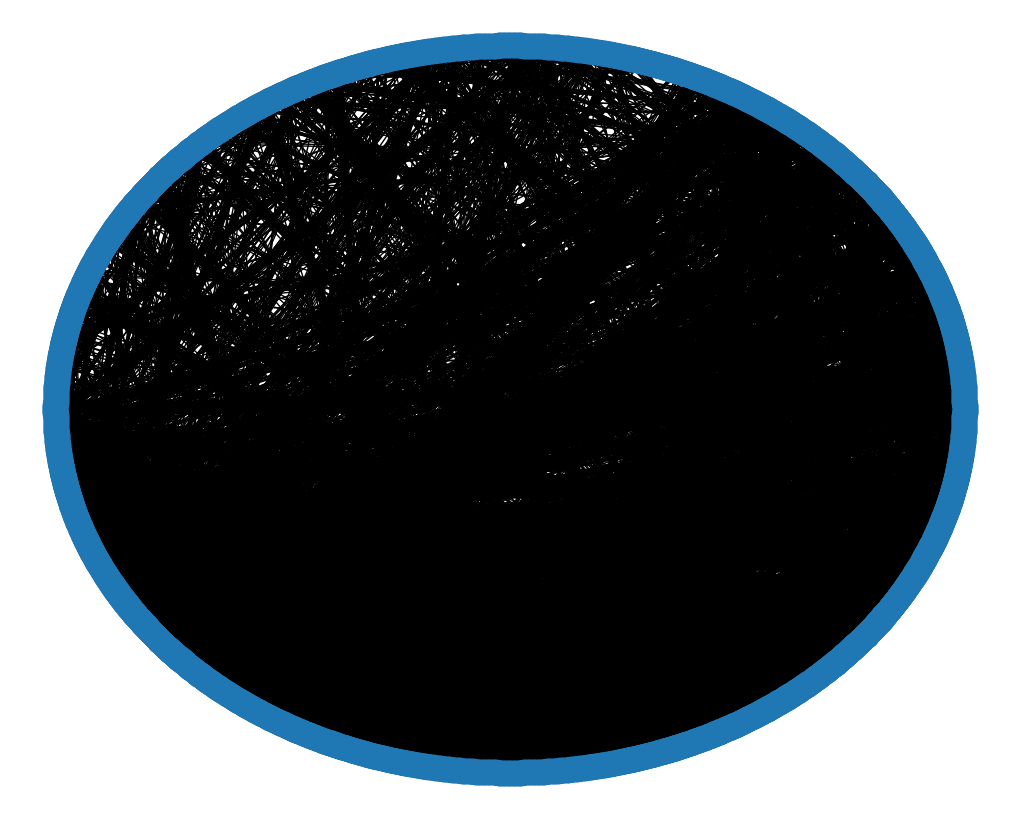

In [47]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(g)